In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)


%matplotlib inline

## Load Data

In [2]:
incident_data = pd.read_csv(
    "../data/clean/incident_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
stop_data = pd.read_csv(
    "../data/clean/stop_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
arrest_data = pd.read_csv(
    "../data/clean/arrest_data_with_wards.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
officer_data = pd.read_csv(
    "../data/clean/officers.csv", parse_dates=["year"], low_memory=False
)

In [3]:
incident_data.head().T

,0,1,2,3,4
x,-76.963243,-77.073113,-76.971909,-76.991735,-77.036482
y,38.925035,38.937336,38.84779,38.863048,38.92793
ccn,21029645,21029649,21029667,21029668,21029675
report_dat,2021/03/08 14:06:13+00,2021/03/08 14:27:38+00,2021/03/08 15:54:20+00,2021/03/08 15:46:58+00,2021/03/08 16:13:18+00
shift,DAY,DAY,DAY,DAY,DAY
method,OTHERS,OTHERS,OTHERS,OTHERS,OTHERS
offense,THEFT F/AUTO,BURGLARY,THEFT/OTHER,THEFT F/AUTO,BURGLARY
block,3100 - 3199 BLOCK OF APPLE ROAD NE,3700 - 3799 BLOCK OF PORTER STREET NW,2200 - 2299 BLOCK OF SAVANNAH STREET SE,2300 - 2399 BLOCK OF MARTIN LUTHER KING JR AVE...,3032 - 3099 BLOCK OF 16TH STREET NW
xblock,403187.48,393661.44,402438.66448,400717.53,396836.88
yblock,139684.18,141051.53,131109.085399,132802.55,140005.49


In [4]:
stop_data.head().T

,0,1,2,3,4
prop_search_obj_warrant,NaN,NaN,NaN,NaN,NaN
voided_tickets,NaN,NaN,NaN,NaN,NaN
tickets_issued,NaN,NaN,NaN,NaN,NaN
per_pro_pat_down_obj_seize,NaN,NaN,NaN,NaN,NaN
prop_srch_obj_prob_cause,NaN,NaN,NaN,NaN,NaN
person_srch_obj_seized_war,NaN,NaN,NaN,NaN,None ;
stop_reason_nonticket,Warrant/court order,Warrant/court order,Warrant/court order,Warrant/court order,Warrant/court order
gis_id,Stop_Incidents_1,Stop_Incidents_2,Stop_Incidents_3,Stop_Incidents_4,Stop_Incidents_5
traffic_involved,0,0,0,0,0
property_search_prob_cause,0,0,0,0,0


In [5]:
arrest_data.tail().T

,295797,295798,295799,295800,295801
type,Adult,Adult,Adult,Adult,Adult
year,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00
date_,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00
hour,19,6,9,19,7
ccn,6e841ca12f1ad2a2b3a96367ba8bd638e99d2b80,ef6db8209505f4b7c3707f1ac23cf24d034f05d9,113a8985070785d26d020cf91332c9d813fd25ac,70421f9473a5a4dca74fa86ce0a6e12cf6d6f182,04258d1c4a98ae0b291615deb4cda4ea7eff9361
arrest_number,2fd70f06106ce628fc41efa0857054c207f2e835,20e5e0a9fba65c02a0eac9390f461610b1a3b4d2,81701086aa66fb71ed5a9e979a19a02643628030,bc49058f1e17f5fb399d80509070a9aa7a6ae3ca,5d858ec506990dadd068ddcdde61008956d22e77
age,21,19,19,18,18
defendant_psa,608.0,601.0,507.0,NaN,704.0
defendant_district,6D,6D,5D,NaN,7D
race,BLACK,BLACK,BLACK,BLACK,BLACK


In [6]:
officer_data

,year,officers
0,1999-01-01,3466
1,2000-01-01,3628
2,2001-01-01,3616
3,2002-01-01,3637
4,2003-01-01,3664
5,2004-01-01,3800
6,2005-01-01,3801
7,2006-01-01,3800
8,2007-01-01,3910
9,2008-01-01,4051


## Data Ranges

In [7]:
[(d.year.min(), d.year.max()) for d in [incident_data, stop_data, arrest_data]]

[(Timestamp('1800-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')),
 (Timestamp('2019-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')),
 (Timestamp('2013-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00'))]

In [8]:
[(d.date.min(), d.date.max()) for d in [incident_data, stop_data, arrest_data]]

[(Timestamp('1800-01-15 19:08:58+0000', tz='UTC'),
  Timestamp('2024-03-18 03:15:00+0000', tz='UTC')),
 (Timestamp('2019-07-22 04:00:00+0000', tz='UTC'),
  Timestamp('2024-06-30 03:56:00+0000', tz='UTC')),
 ('2013-01-01 05:00:00+00:00', '2024-12-31 00:00:00')]

## Arrest Data

In [9]:
# temporary fix because I don't want to re-run ETL, but it's there and will happen next time


def arrest_category_cleanup(df: pd.DataFrame) -> pd.DataFrame:
    """
    Data through 2017 has "Na" dropped from the strings in the category field,
    replaced with a single space.
    Like Dave says, if you don't have the right tools, don't use a spoon.
    This also corrects an unrelated errors in the Release Violations and
    Fraud/Financial categories, rolling up a few random values.
    """
    fixes = {
        " rcotics": "Narcotics",
        "Fraud and Fi ncial Crimes": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Coun)": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Forg)": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Frau)": "Fraud and Financial Crimes",
        "Kid pping": "Kidnapping",
        "Release Violations/Fugitive (Fug)": "Release Violations/Fugitive",
        "Release Violations/Fugitive (Warr)": "Release Violations/Fugitive",
        "Release Violations": "Release Violations/Fugitive",
    }

    df["category"] = df.category.apply(lambda x: fixes.get(x, x))
    return df

In [10]:
arrest_data["defendant_out_of_state"] = (
    arrest_data.defendant_district == "Out of State"
) | (arrest_data.defendant_district.isna())

In [11]:
arrest_data = arrest_category_cleanup(arrest_data)

[Text(0.5, 1.0, 'MPD Monthly Arrests'), Text(0.5, 0, ''), (0.0, 3313.45)]

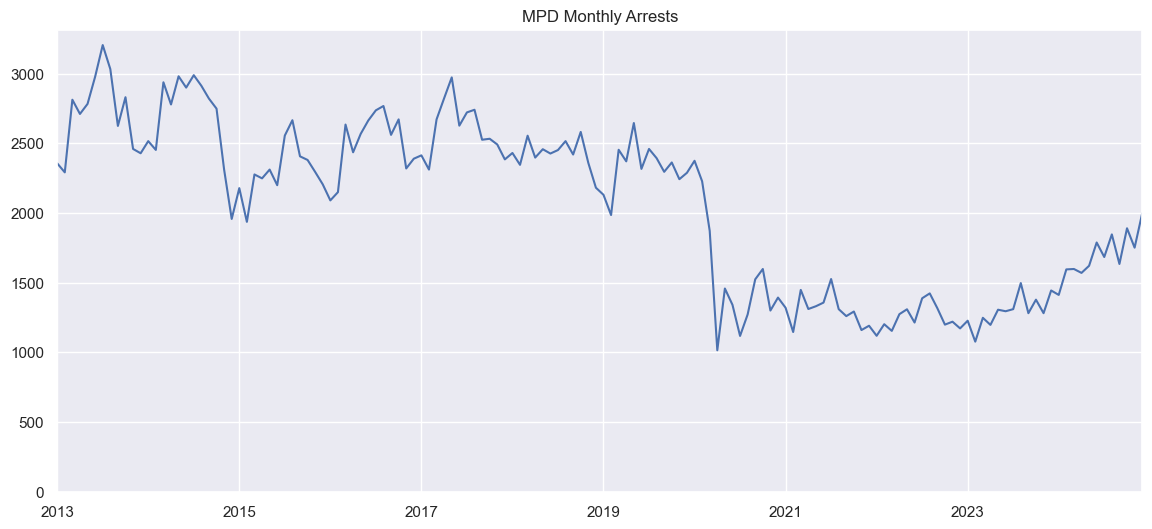

In [12]:
sns.set(rc={"figure.figsize": (14, 6)})
g = arrest_data.groupby("month_year").ccn.count().plot()
g.set(
    title="MPD Monthly Arrests",
    xlabel=None,
    ylim=(0, None),
)

In [13]:
# Quick and dirty monthly dataset
incidents_monthly = incident_data.groupby("month_year").ccn.count()[
    85:-1
]  # manually trim some BS
stops_monthly = stop_data.groupby("month_year").objectid.count()[1:-1]
arrests_monthly = arrest_data.groupby("month_year").ccn.count()

In [14]:
monthly_summary = pd.concat(
    [incidents_monthly, stops_monthly, arrests_monthly], axis=1
).reset_index()
monthly_summary.columns = ["Month", "Incidents", "Stops", "Arrests"]

In [15]:
monthly_summary["Year"] = monthly_summary.Month.dt.year

In [16]:
monthly_summary = monthly_summary[["Year", "Month", "Incidents", "Stops", "Arrests"]]

In [17]:
officers_annual_dict = dict(zip(officer_data.year.dt.year, officer_data.officers))

In [18]:
monthly_summary["Sworn Officers"] = [
    officers_annual_dict[y] for y in monthly_summary.Year
]

In [19]:
monthly_summary["Incidents per Officer per Month"] = (
    monthly_summary.Incidents / monthly_summary["Sworn Officers"]
)
monthly_summary["Stops per Officer per Month"] = (
    monthly_summary.Stops / monthly_summary["Sworn Officers"]
)
monthly_summary["Arrests per Officer per Month"] = (
    monthly_summary.Arrests / monthly_summary["Sworn Officers"]
)

In [20]:
monthly_summary_rates = pd.melt(
    monthly_summary[
        [
            "Month",
            "Incidents per Officer per Month",
            "Stops per Officer per Month",
            "Arrests per Officer per Month",
        ]
    ],
    "Month",
)

<Axes: xlabel='Month', ylabel='value'>

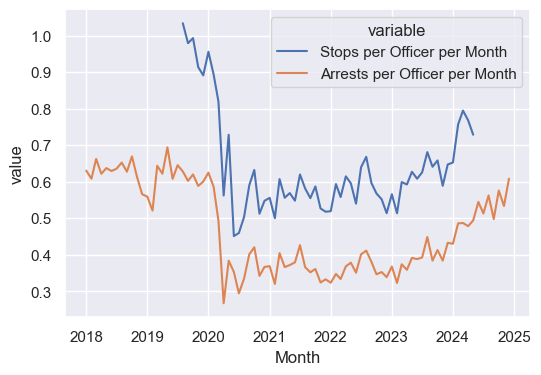

In [21]:
sns.set(rc={"figure.figsize": (6, 4)})

sns.lineplot(
    data=monthly_summary_rates[
        (monthly_summary_rates.Month > "2017-12-01")
        & (monthly_summary_rates.variable != "Incidents per Officer per Month")
    ],
    x="Month",
    y="value",
    hue="variable",
)

### Make some groupbys for use elsewhere

In [22]:
arrests_year_category = (
    arrest_data.groupby(["year", "category"]).ccn.count().reset_index()
)
arrests_year_category.pivot(
    columns="year", index="category", values="ccn"
).to_clipboard()
# manual cleanup done here: https://docs.google.com/spreadsheets/d/1N7FVH9PqlW8NjiL6RcXTV7vrrWRhN4aLlYmYrWlEXXM/edit?usp=sharing

In [23]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/11/14 05:00:00+00,2013/11/20 05:00:00+00,2013/12/03 05:00:00+00,2013/12/05 05:00:00+00,2013/12/09 05:00:00+00
hour,6,15,0,21,23
ccn,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...
arrest_number,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...
age,37,39,40,65,31
defendant_psa,Out of State,602,Out of State,502,702
defendant_district,Out of State,6D,Out of State,5D,7D
race,WHITE,BLACK,BLACK,BLACK,BLACK


In [38]:
arrests_year_district = (
    arrest_data.groupby(["year", "arrest_district"]).ccn.count().reset_index()
)
arrests_year_district.pivot(
    columns="year", index="arrest_district", values="ccn"
).to_csv("../data/clean/arrests_by_district_year.tsv", sep="\t", index=False)
# manual cleanup done here: https://docs.google.com/spreadsheets/d/1N7FVH9PqlW8NjiL6RcXTV7vrrWRhN4aLlYmYrWlEXXM/edit?usp=sharing

In [39]:
arrests_year_ward = arrest_data.groupby(["year", "WARD"]).ccn.count().reset_index()
arrests_year_ward.pivot(columns="year", index="WARD", values="ccn").to_csv(
    "../data/clean/arrests_by_ward_year.tsv", sep="\t", index=False
)

In [41]:
arrests_year_district_category = (
    arrest_data.groupby(["year", "arrest_district", "category"])
    .ccn.count()
    .reset_index()
)
arrests_year_district_category.pivot(
    index=["category"], columns=["arrest_district", "year"], values="ccn"
).to_csv("../data/clean/arrests_by_district_category_year.tsv", sep="\t", index=False)

In [42]:
arrests_year_ward_category = (
    arrest_data.groupby(["year", "WARD", "category"]).ccn.count().reset_index()
)
arrests_year_ward_category.pivot(
    index=["category"], columns=["WARD", "year"], values="ccn"
).to_csv("../data/clean/arrests_by_ward_category_year.tsv", sep="\t", index=False)

In [43]:
arrests_year_category.pivot(columns="year", index="category", values="ccn")

year,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01,2023-01-01,2024-01-01
category,,,,,,,,,,,,
Aggravated Assault,284.0,282.0,235.0,194.0,174.0,133.0,139.0,91.0,97.0,88.0,125.0,243.0
Arson,3.0,6.0,6.0,5.0,4.0,4.0,4.0,5.0,NaN,4.0,6.0,6.0
Assault on a Police Officer,839.0,855.0,749.0,606.0,438.0,405.0,383.0,377.0,346.0,311.0,300.0,331.0
Assault with a Dangerous Weapon,1239.0,1277.0,1155.0,1058.0,860.0,785.0,668.0,582.0,571.0,475.0,409.0,453.0
Burglary,243.0,248.0,198.0,279.0,241.0,182.0,146.0,205.0,133.0,117.0,117.0,152.0
Damage to Property,588.0,675.0,706.0,822.0,814.0,738.0,691.0,668.0,623.0,600.0,637.0,549.0
Disorderly Conduct,890.0,852.0,656.0,628.0,757.0,469.0,352.0,236.0,65.0,110.0,109.0,198.0
Driving/Boating While Intoxicated,1311.0,1337.0,1078.0,1307.0,1306.0,1475.0,1305.0,950.0,835.0,627.0,643.0,674.0
Fraud and Financial Crimes,518.0,223.0,148.0,149.0,144.0,163.0,129.0,54.0,32.0,48.0,25.0,34.0


In [52]:
# Compare 2024 arrest patterns with 2021-2023 average, accounting for partial year
# First, get the number of days in each year's data
days_in_data = arrest_data.groupby("year").date.nunique().reset_index()
days_in_data.columns = ["year", "days"]

# Create a pivot table for 2021-2023 average by category and district, normalized by days
arrests_2021_2023 = arrest_data[
    (arrest_data.year >= "2021-01-01") & 
    (arrest_data.year < "2024-01-01")
].groupby(["category", "arrest_district", "year"]).ccn.count().reset_index()

# Merge with days data
arrests_2021_2023 = arrests_2021_2023.merge(days_in_data, on="year")

# Calculate daily rate for each year
arrests_2021_2023["daily_rate"] = arrests_2021_2023["ccn"] / arrests_2021_2023["days"]

# Calculate 3-year average daily rate
arrests_2021_2023_avg = arrests_2021_2023.groupby(["category", "arrest_district"]).daily_rate.mean().reset_index()

# Get 2024 data and its days
arrests_2024 = arrest_data[
    arrest_data.year >= "2024-01-01"
].groupby(["category", "arrest_district"]).ccn.count().reset_index()

days_2024 = days_in_data[days_in_data.year >= "2024-01-01"]["days"].iloc[0]

# Calculate 2024 daily rate
arrests_2024["daily_rate_2024"] = arrests_2024["ccn"] / days_2024

# Merge the data
comparison = arrests_2024.merge(
    arrests_2021_2023_avg,
    on=["category", "arrest_district"],
    suffixes=("_2024", "_2021_2023_avg")
)

# Calculate absolute and percentage changes in daily rates
comparison["absolute_change"] = comparison["daily_rate_2024"] - comparison["daily_rate"]
comparison["percent_change"] = ((comparison["daily_rate_2024"] - comparison["daily_rate"]) / comparison["daily_rate"] * 100).round(2)

# Sort by absolute change to see biggest differences
comparison_sorted = comparison.sort_values("absolute_change", ascending=False)

# Display top 10 increases and decreases
print("Top 10 Largest Increases in Daily Arrest Rates (2024 vs 2021-2023 Average):")
print(comparison_sorted.head(10)[["category", "arrest_district", "daily_rate_2024", "daily_rate", "absolute_change", "percent_change"]])
print("\nTop 10 Largest Decreases in Daily Arrest Rates (2024 vs 2021-2023 Average):")
print(comparison_sorted.tail(10)[["category", "arrest_district", "daily_rate_2024", "daily_rate", "absolute_change", "percent_change"]])

# Calculate overall changes by category (across all districts)
category_changes = comparison.groupby("category").agg({
    "daily_rate_2024": "sum",
    "daily_rate": "sum",
    "absolute_change": "sum",
    "percent_change": "mean"
}).round(2)

print("\nOverall Changes by Category (Daily Rates):")
print(category_changes.sort_values("absolute_change", ascending=False))

# Calculate overall changes by district (across all categories)
district_changes = comparison.groupby("arrest_district").agg({
    "daily_rate_2024": "sum",
    "daily_rate": "sum",
    "absolute_change": "sum",
    "percent_change": "mean"
}).round(2)

print("\nOverall Changes by District (Daily Rates):")
print(district_changes.sort_values("absolute_change", ascending=False))

Top 10 Largest Increases in Daily Arrest Rates (2024 vs 2021-2023 Average):
                  category arrest_district  daily_rate_2024  daily_rate  \
170     Traffic Violations              6D         3.480874    0.797260   
153                  Theft              3D         1.560109    0.407306   
171     Traffic Violations              7D         1.292350    0.271233   
169     Traffic Violations              5D         1.125683    0.319635   
93               Narcotics              7D         1.155738    0.369863   
78   Liquor Law Violations              6D         0.765027    0.049315   
89               Narcotics              3D         0.882514    0.228311   
75   Liquor Law Violations              3D         0.699454    0.069406   
168     Traffic Violations              4D         0.833333    0.309589   
152                  Theft              2D         0.909836    0.446575   

     absolute_change  percent_change  
170         2.683614          336.60  
153         1.152803

In [51]:
# Analyze Simple Assault arrests by year and district
simple_assaults = arrest_data[arrest_data.category == "Simple Assault"].groupby(["year", "arrest_district"]).ccn.count().reset_index()

# Pivot to show yearly trends by district
simple_assaults_pivot = simple_assaults.pivot(
    columns="year",
    index="arrest_district",
    values="ccn"
).round(0)

print("Simple Assault Arrests by District and Year:")
print(simple_assaults_pivot)

# Calculate yearly totals
yearly_totals = arrest_data[arrest_data.category == "Simple Assault"].groupby("year").ccn.count()

print("\nTotal Simple Assault Arrests by Year:")
print(yearly_totals)

Simple Assault Arrests by District and Year:
year             2013-01-01  2014-01-01  2015-01-01  2016-01-01  2017-01-01  \
arrest_district                                                               
1D                      680         676         722         817         847   
2D                      293         384         399         468         483   
3D                      646         692         637         671         618   
4D                      694         734         620         699         712   
5D                      817         857         977         975         899   
6D                     1428        1571        1405        1218        1364   
7D                     1066        1210        1278        1270        1248   

year             2018-01-01  2019-01-01  2020-01-01  2021-01-01  2022-01-01  \
arrest_district                                                               
1D                      731         644         446         518         495   
2D    

In [27]:
traffic_arrests = (
    arrest_data[
        arrest_data.category.isin(
            ["Traffic Violations", "Driving/Boating While Intoxicated"]
        )
    ]
    .groupby(["month_year", "category"])
    .ccn.count()
    .reset_index()
)

In [28]:
traffic_arrests.rename(
    columns={"ccn": "Traffic Arrests", "category": "Category"}, inplace=True
)

In [29]:
traffic_arrests["Category"] = traffic_arrests.Category.replace(
    "Driving/Boating While Intoxicated", "DWI"
)

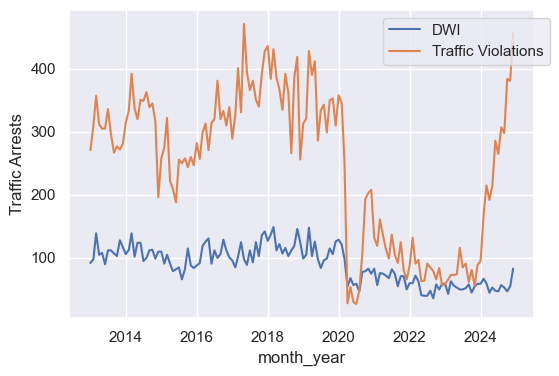

In [44]:
sns.lineplot(traffic_arrests, x="month_year", y="Traffic Arrests", hue="Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper right")

# Display the plot
plt.show()

In [31]:
stop_data.stop_reason_nonticket.value_counts().tail(10)

stop_reason_nonticket
Information obtained from law enforcement sources; Individual<U+0092>s characteristics; Demeanor during a field contact; Call for service    1
Call for service; Individual<U+0092>s actions; Prior knowledge; BOLO/Lookout                                                                 1
Call for service; Response to crash; Suspicion of criminal activity (self-initiated); Individual<U+0092>s actions                            1
Observed a weapon; Call for service; Information obtained from law enforcement sources                                                       1
BOLO/Lookout; Traffic violation; Individual<U+0092>s actions                                                                                 1
Call for service; Information obtained from witnesses or informants; Warrant/court order; BOLO/Lookout                                       1
Observed a weapon; Information obtained from witnesses or informants; Individual<U+0092>s actions; Individual<U+0092>s c

In [32]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/11/14 05:00:00+00,2013/11/20 05:00:00+00,2013/12/03 05:00:00+00,2013/12/05 05:00:00+00,2013/12/09 05:00:00+00
hour,6,15,0,21,23
ccn,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...
arrest_number,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...
age,37,39,40,65,31
defendant_psa,Out of State,602,Out of State,502,702
defendant_district,Out of State,6D,Out of State,5D,7D
race,WHITE,BLACK,BLACK,BLACK,BLACK


<Axes: xlabel='month_year', ylabel='ccn'>

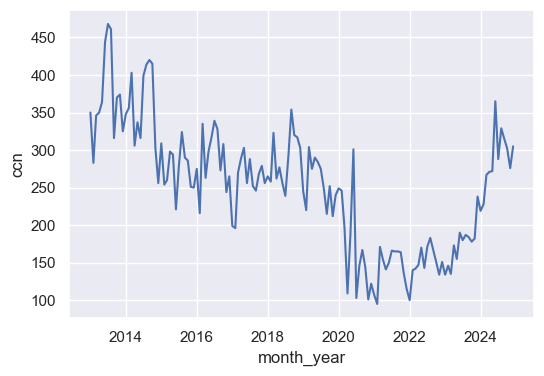

In [33]:
sns.lineplot(
    data=arrest_data[(arrest_data.offense_district == "3D")]
    .groupby(["month_year"])
    .ccn.count()
    .reset_index(),
    x="month_year",
    y="ccn",
)

In [34]:
arrest_data.defendant_district.value_counts()

defendant_district
7D              54306
6D              50083
Out of State    39938
5D              32941
4D              26243
1D              19608
3D              16926
2D               5510
UNK              2458
Name: count, dtype: int64

In [35]:
arrest_data[(arrest_data.offense_district == "3D")].groupby(
    ["year", "defendant_out_of_state"]
).ccn.count()

year        defendant_out_of_state
2013-01-01  False                     3132
            True                      1319
2014-01-01  False                     2936
            True                      1337
2015-01-01  False                     2173
            True                      1143
2016-01-01  False                     2186
            True                      1275
2017-01-01  False                     1910
            True                      1192
2018-01-01  False                     2016
            True                      1449
2019-01-01  False                     1763
            True                      1298
2020-01-01  False                     1241
            True                       831
2021-01-01  False                     1040
            True                       689
2022-01-01  False                     1009
            True                       790
2023-01-01  False                     1208
            True                       874
2024-01-01  False  

In [6]:
arrest_data.category.value_counts()

category
Simple Assault                        66170
Traffic Violations                    35708
Release Violations/Fugitive           31814
Theft                                 17763
 rcotics                              16840
Other Crimes                          15790
Driving/Boating While Intoxicated     12848
Weapon Violations                     12685
Assault with a Dangerous Weapon        9534
Narcotics                              9533
Liquor Law Violations                  8568
Damage to Property                     8111
Property Crimes                        6418
Assault on a Police Officer            5942
Disorderly Conduct                     5322
Prostitution                           4758
Robbery                                4337
Offenses Against Family & Children     4026
Release Violations                     3269
Release Violations/Fugitive (Warr)     2823
Burglary                               2261
Sex Offenses                           2122
Aggravated Assault     